## Decision Tree Classifier

In [144]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier   #for classification we take DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## Load and Preprocess Dataset

In [147]:
# Load dataset
data = load_iris()


In [149]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [153]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [100]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [101]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data.target)

In [102]:
y.value_counts()   #balanced datset so we can take performnace metric as Accuracy (scoring)

0    50
1    50
2    50
Name: count, dtype: int64

In [103]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparameter Tuning

In [105]:
# Define the parameter grid for hyperparameter tuning of this model 
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

## Train Decision Tree Classifier Model

In [107]:
# Initialize the Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid, cv=5, scoring='accuracy')         #taking performance metric in scoring as accuracy

# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [108]:
# Best hyperparameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Accuracy: 95.00%


In [109]:
# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Accuracy of the tuned model
tuned_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {tuned_accuracy * 100:.2f}%")

Tuned Model Accuracy: 100.00%


In [76]:
# Tuned model evaluation
print("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nTuned Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Tuned Model Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.25, 0.375, 'x[0] <= 5.15\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

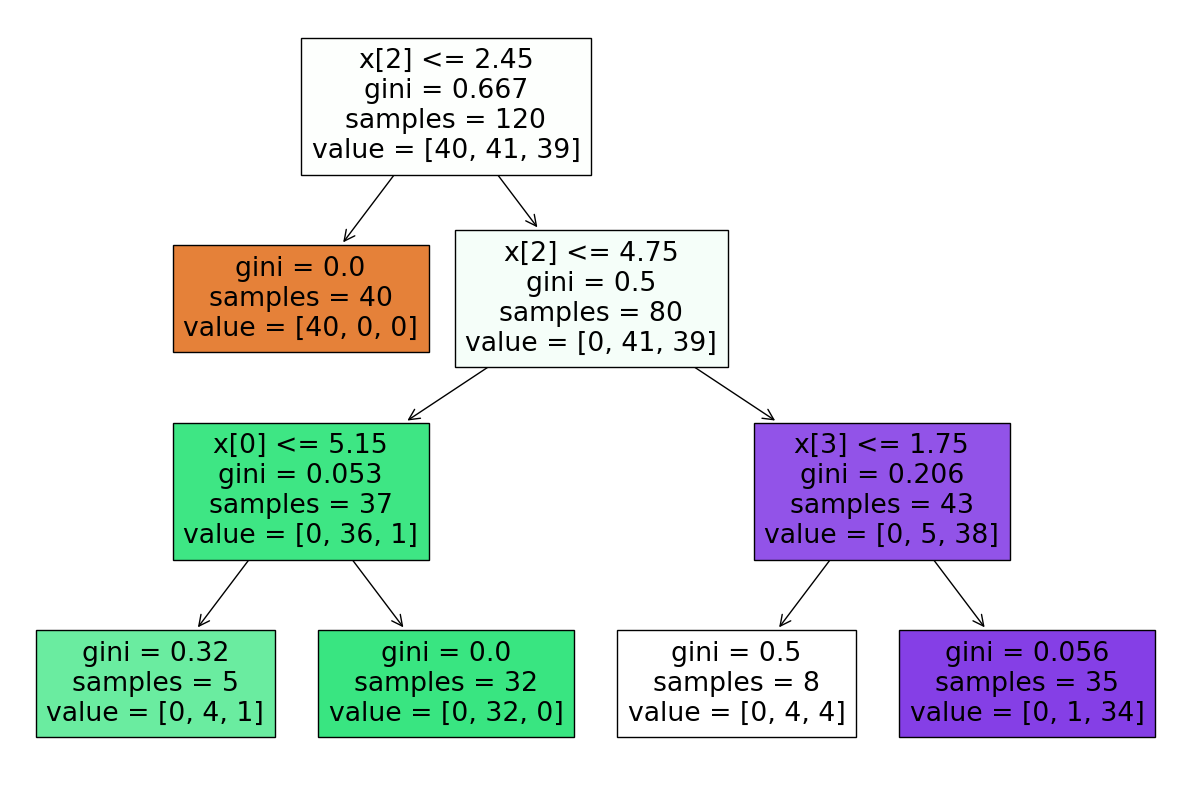

In [92]:
#graph of tree 
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_model,filled=True)   #you need to extract the best decision tree model from GridSearchCV and then plot that. You can do this by using the best_estimator_ attribute of the GridSearchCV object.

In [125]:
'''
Example of Decision Tree:
Let’s say you want to classify whether an email is spam or not based on features like the number of certain keywords in the subject line, whether there is an attachment, etc.

At the root node, you might split on whether certain keywords like "offer" or "discount" appear in the email.
Each child node might split further on whether there's an attachment.
This continues until all the nodes are pure (i.e., they contain emails that are either all spam or all not spam).

'''

'\nExample of Decision Tree:\nLet’s say you want to classify whether an email is spam or not based on features like the number of certain keywords in the subject line, whether there is an attachment, etc.\n\nAt the root node, you might split on whether certain keywords like "offer" or "discount" appear in the email.\nEach child node might split further on whether there\'s an attachment.\nThis continues until all the nodes are pure (i.e., they contain emails that are either all spam or all not spam).\n\n'

In [ ]:
'''
The statement "Tuning these hyperparameters effectively can balance the trade-off between bias and variance, allowing the decision tree to generalize well to unseen data" refers to the process of adjusting the hyperparameters of a Decision Tree model to prevent overfitting or underfitting. Let's break it down:

1. Bias-Variance Trade-off
Bias: Refers to the error introduced by simplifying the assumptions made by the model. High bias means the model is too simple and doesn't capture the underlying patterns well, leading to underfitting. Underfitting results in poor performance on both the training data and unseen data.

Variance: Refers to the model's sensitivity to small fluctuations in the training data. High variance means the model is too complex and captures noise or random fluctuations in the training data, leading to overfitting. Overfitting results in good performance on the training data but poor performance on unseen data.

2. Balancing Bias and Variance
The goal is to find a middle ground where the model captures the underlying patterns in the data (low bias) without overfitting to noise (low variance). This is where hyperparameter tuning plays a role.

3. Impact of Hyperparameter Tuning
High Bias (Underfitting):
If hyperparameters like max_depth are set too low, the tree will be too shallow, and the model will be too simplistic. It won't capture the complexity of the data, leading to high bias.
High Variance (Overfitting):
If hyperparameters like max_depth or min_samples_split are set too high (or too low, in the case of min_samples_split), the tree becomes too deep and complex, capturing even noise in the data. This leads to high variance, where the model performs well on the training data but poorly on unseen data.

4. Generalization to Unseen Data
Generalization means that the model performs well not only on the training data but also on new, unseen data. A well-tuned decision tree has an appropriate balance between bias and variance, ensuring that it captures the essential patterns in the data without being overly influenced by noise or small fluctuations in the training set.

Example:
If you set max_depth=2, the tree will be very shallow and may miss important patterns (underfitting, high bias).
If you set max_depth=20, the tree might become very complex and memorize the training data, including irrelevant details (overfitting, high variance).
Tuning max_depth=5, for instance, might give a good balance where the tree captures key patterns but doesn't overfit, leading to better performance on unseen data.

In summary, hyperparameter tuning helps to find the right balance between bias and variance, resulting in a model that generalizes well to new data

'''